In [255]:
import pandas as pd
import numpy as np

In [256]:
df=pd.read_csv("Data Analyst - Test Data - US.csv")

In [257]:
df.head(-1)

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor
...,...,...,...
6442,"·hmm, the proximity to the airport, on time sh...",2019/07/13,Trinidad and Tobago
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America
6444,·the internet barely worked or didn't work,2019/07/12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019/07/10,United States of America


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [259]:
df['Review'][3]

'The hotel was adequate for my stay. The strips in the bathtub were useless as I fell while taking a shower. I asked the front desk staff several times to get a bath mat but they never did. Management was unresponsive to my request which was very poor; someone should have gone to a dollar store and gotten a bath mat. Breakfast was good but it would have been nice to have had yogurt and/or cottage cheese on the buffet.\n  \n  Read more\n  Read less'

In [260]:
df2=df
df2['Review']=df['Review'].astype(str)

In [261]:
df2

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America
6444,·the internet barely worked or didn't work,2019/07/12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019/07/10,United States of America
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America


In [262]:
df['Location'].value_counts()

United States of America    116
New York                     34
California                   19
San Jose                     19
Canada                       16
                           ... 
Huntington Beach              1
Lubbock tx                    1
irvine, us                    1
Staffordshire                 1
Trinidad                      1
Name: Location, Length: 1082, dtype: int64

# Cleaning

In [263]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import en_core_web_sm

In [264]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

C:\Users\Ajay\anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [265]:
df2['new_reviews'] = df2['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['new_reviews'].head()

0    i was very impressed with the resort. great st...
1    the rooms were nice the outside needs work als...
2    great location! i have stayed at this hotel on...
3    the hotel was adequate for my stay. the strips...
4    great location, room was large and spacious. p...
Name: new_reviews, dtype: object

In [266]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review       6448 non-null   object
 1   date         6448 non-null   object
 2   Location     1711 non-null   object
 3   new_reviews  6448 non-null   object
dtypes: object(4)
memory usage: 201.6+ KB


In [267]:
df2['new_reviews'] = df2['new_reviews'].str.replace('[^\w\s]','')
df2['new_reviews'].head()

0    i was very impressed with the resort great sta...
1    the rooms were nice the outside needs work als...
2    great location i have stayed at this hotel on ...
3    the hotel was adequate for my stay the strips ...
4    great location room was large and spacious par...
Name: new_reviews, dtype: object

In [268]:
stop = stopwords.words('english')
df2['new_reviews'] = df2['new_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df2.head(20)

,Review,date,Location,new_reviews
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian,impressed resort great staff main resort pool ...
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,rooms nice outside needs work also free breakf...
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,great location stayed hotel last three trips n...
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN,hotel adequate stay strips bathtub useless fel...
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,great location room large spacious parking eas...
5,All the options for fun were great! Do wish th...,2019/08/19,NaN,options fun great wish better policy lazy rive...
6,Old. Musty. Motel. \n Bath need an update asap...,2019/08/19,NaN,old musty motel bath need update asap read rea...
7,Loved the layout of the hotel and the relaxing...,2019/08/19,NaN,loved layout hotel relaxing pool area con hous...
8,My wife and I loved everything about it. It’s ...,2019/08/19,NaN,wife loved everything close everything everywh...
9,"rooms were very small, was told i had a compli...",2019/08/19,NaN,rooms small told complimentary upgrade empire ...


In [269]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df2['new_reviews']= df2['new_reviews'].apply(space)
df2.head(20)

,Review,date,Location,new_reviews
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian,impressed resort great staff main resort pool ...
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,room nice outside need work also free breakfas...
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,great location stay hotel last three trip new ...
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN,hotel adequate stay strip bathtub useless fall...
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,great location room large spacious parking eas...
5,All the options for fun were great! Do wish th...,2019/08/19,NaN,option fun great wish well policy lazy river f...
6,Old. Musty. Motel. \n Bath need an update asap...,2019/08/19,NaN,old musty motel bath need update asap read rea...
7,Loved the layout of the hotel and the relaxing...,2019/08/19,NaN,love layout hotel relax pool area con housekee...
8,My wife and I loved everything about it. It’s ...,2019/08/19,NaN,wife love everything close everything everywhe...
9,"rooms were very small, was told i had a compli...",2019/08/19,NaN,room small tell complimentary upgrade empire s...


### clearning out Location with NaN

In [270]:
#this dataframe is for location analysis,where we find analysis of most reviewed places.

df3=df2

In [271]:
df3=df3.dropna()
df3

,Review,date,Location,new_reviews
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian,impressed resort great staff main resort pool ...
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,room nice outside need work also free breakfas...
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,great location stay hotel last three trip new ...
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,great location room large spacious parking eas...
10,Very clean and friendly and I love the locatio...,2019/08/19,California,clean friendly love location restaurant inside...
...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America,staff friendly frank chef buffet bar top meeti...
6444,·the internet barely worked or didn't work,2019/07/12,United States of America,internet barely work do not work
6445,·the location was great.\n \n \n \n \n ·the be...,2019/07/10,United States of America,location great bed uncomfortable bed ever
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America,early check staff accommodate able check sever...


In [272]:
df3=df3.drop(['Review','date'],axis=1)

In [273]:
df3=df3.reset_index(drop=True)

In [274]:
df3

,Location,new_reviews
0,Sebastian,impressed resort great staff main resort pool ...
1,Los Angeles,room nice outside need work also free breakfas...
2,Georgia,great location stay hotel last three trip new ...
3,Palm Harbor,great location room large spacious parking eas...
4,California,clean friendly love location restaurant inside...
...,...,...
1706,United States of America,staff friendly frank chef buffet bar top meeti...
1707,United States of America,internet barely work do not work
1708,United States of America,location great bed uncomfortable bed ever
1709,United States of America,early check staff accommodate able check sever...


## sentiment analysis

In [275]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [276]:
sia=SentimentIntensityAnalyzer()

In [277]:
df3['neg']=df3['new_reviews'].apply(lambda x:sia.polarity_scores(x)['neg'])
df3['neu']=df3['new_reviews'].apply(lambda x:sia.polarity_scores(x)['neu'])
df3['pos']=df3['new_reviews'].apply(lambda x:sia.polarity_scores(x)['pos'])
df3['Comp']=df3['new_reviews'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [278]:
df3

,Location,new_reviews,neg,neu,pos,Comp
0,Sebastian,impressed resort great staff main resort pool ...,0.000,0.500,0.500,0.9325
1,Los Angeles,room nice outside need work also free breakfas...,0.000,0.498,0.502,0.8779
2,Georgia,great location stay hotel last three trip new ...,0.000,0.728,0.272,0.6249
3,Palm Harbor,great location room large spacious parking eas...,0.000,0.411,0.589,0.9169
4,California,clean friendly love location restaurant inside...,0.000,0.507,0.493,0.9477
...,...,...,...,...,...,...
1706,United States of America,staff friendly frank chef buffet bar top meeti...,0.000,0.702,0.298,0.9657
1707,United States of America,internet barely work do not work,0.000,1.000,0.000,0.0000
1708,United States of America,location great bed uncomfortable bed ever,0.243,0.374,0.383,0.3612
1709,United States of America,early check staff accommodate able check sever...,0.000,1.000,0.000,0.0000


In [279]:
df3['Comp']=df3['Comp'].round()

In [280]:
df3

,Location,new_reviews,neg,neu,pos,Comp
0,Sebastian,impressed resort great staff main resort pool ...,0.000,0.500,0.500,1.0
1,Los Angeles,room nice outside need work also free breakfas...,0.000,0.498,0.502,1.0
2,Georgia,great location stay hotel last three trip new ...,0.000,0.728,0.272,1.0
3,Palm Harbor,great location room large spacious parking eas...,0.000,0.411,0.589,1.0
4,California,clean friendly love location restaurant inside...,0.000,0.507,0.493,1.0
...,...,...,...,...,...,...
1706,United States of America,staff friendly frank chef buffet bar top meeti...,0.000,0.702,0.298,1.0
1707,United States of America,internet barely work do not work,0.000,1.000,0.000,0.0
1708,United States of America,location great bed uncomfortable bed ever,0.243,0.374,0.383,0.0
1709,United States of America,early check staff accommodate able check sever...,0.000,1.000,0.000,0.0


In [281]:
df3['Location'].value_counts()

United States of America    116
New York                     34
San Jose                     19
California                   19
Florida                      16
                           ... 
Omaha                         1
Huntington Beach              1
Lubbock tx                    1
irvine, us                    1
Albany NY                     1
Name: Location, Length: 1082, dtype: int64

In [282]:
df


,Review,date,Location,new_reviews
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian,impressed resort great staff main resort pool ...
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,room nice outside need work also free breakfas...
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,great location stay hotel last three trip new ...
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN,hotel adequate stay strip bathtub useless fall...
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,great location room large spacious parking eas...
...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America,staff friendly frank chef buffet bar top meeti...
6444,·the internet barely worked or didn't work,2019/07/12,United States of America,internet barely work do not work
6445,·the location was great.\n \n \n \n \n ·the be...,2019/07/10,United States of America,location great bed uncomfortable bed ever
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America,early check staff accommodate able check sever...


## Dividing the data
### to positive,neutral and negative

In [283]:
df3

,Location,new_reviews,neg,neu,pos,Comp
0,Sebastian,impressed resort great staff main resort pool ...,0.000,0.500,0.500,1.0
1,Los Angeles,room nice outside need work also free breakfas...,0.000,0.498,0.502,1.0
2,Georgia,great location stay hotel last three trip new ...,0.000,0.728,0.272,1.0
3,Palm Harbor,great location room large spacious parking eas...,0.000,0.411,0.589,1.0
4,California,clean friendly love location restaurant inside...,0.000,0.507,0.493,1.0
...,...,...,...,...,...,...
1706,United States of America,staff friendly frank chef buffet bar top meeti...,0.000,0.702,0.298,1.0
1707,United States of America,internet barely work do not work,0.000,1.000,0.000,0.0
1708,United States of America,location great bed uncomfortable bed ever,0.243,0.374,0.383,0.0
1709,United States of America,early check staff accommodate able check sever...,0.000,1.000,0.000,0.0


In [284]:
df3=df3.replace(to_replace=[1.0],value="Positive")
df3=df3.replace(to_replace=[-1.0],value="Negative")
df3=df3.replace(to_replace=[0.0],value="Neutral")

In [285]:
df3=df3.drop(['neg','neu','pos'],axis=1)

In [286]:
positive_reviews=df3[df3['Comp']=='Positive']
negative_reviews=df3[df3['Comp']=='Negative']
Neutral_reviews=df3[df3['Comp']=='Neutral']

In [287]:
df3

,Location,new_reviews,Comp
0,Sebastian,impressed resort great staff main resort pool ...,Positive
1,Los Angeles,room nice outside need work also free breakfas...,Positive
2,Georgia,great location stay hotel last three trip new ...,Positive
3,Palm Harbor,great location room large spacious parking eas...,Positive
4,California,clean friendly love location restaurant inside...,Positive
...,...,...,...
1706,United States of America,staff friendly frank chef buffet bar top meeti...,Positive
1707,United States of America,internet barely work do not work,Neutral
1708,United States of America,location great bed uncomfortable bed ever,Neutral
1709,United States of America,early check staff accommodate able check sever...,Neutral


In [288]:
positive_reviews['Location'].value_counts()

United States of America    58
New York                    18
California                  11
San Jose                    11
Canada                      10
                            ..
sagamore beach ma            1
Fort Collins                 1
Wine Country                 1
Apple valley ca              1
Columbus, Ohio               1
Name: Location, Length: 697, dtype: int64

In [289]:
df3.to_csv('data_main.csv')
positive_reviews.to_csv('positive_reviews.csv')
negative_reviews.to_csv('negative_reviews.csv')
Neutral_reviews.to_csv('Neutral_reviews.csv')

## Word Cloud

In [290]:
wc_pos=positive_reviews['new_reviews']
wc_neg=negative_reviews['new_reviews']
wc_pos=wc_pos.str.cat(sep=',')
wc_neg=wc_neg.str.cat(sep=',')

In [291]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [292]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(wc_neg)

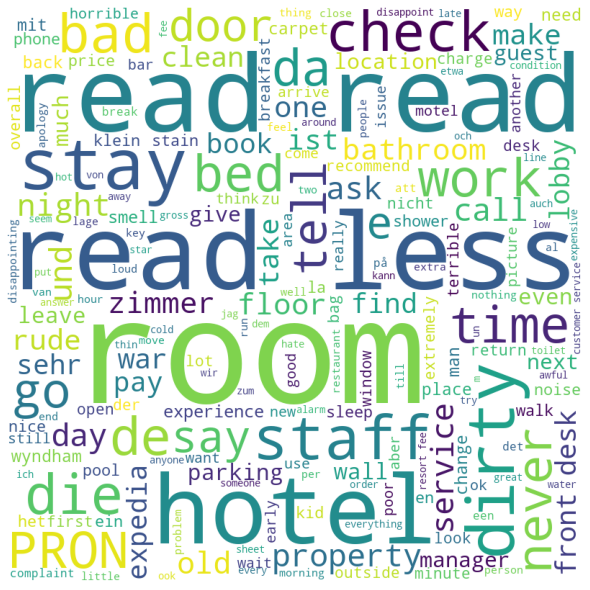

In [293]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

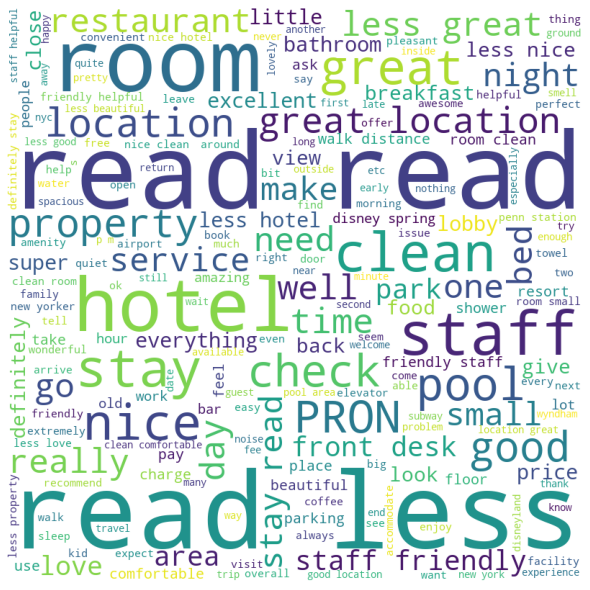

In [295]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(wc_pos)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()